In [1]:
import requests
import pandas as pd
from time import time
from tqdm import tqdm

In [2]:
def get_recommendations(tags, num_tags):
    url = "http://0.0.0.0:8000/recommend"

    headers = {"accept": "application/json", "Content-Type": "application/json"}
    payload = {"tags": tags, "num_tags": num_tags}

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to get recommendations: {response.status_code}")
        return None

In [3]:
df = pd.read_parquet("../data/processed/test.parquet", columns=["tags"])

In [4]:
results = list()

for topn in range(5, 31, 5):
    print(topn)

    for arr in tqdm(df["tags"].sample(2500)):
        tags = ",".join(arr)
        s = time()
        res = get_recommendations(tags, topn)
        e = time()
        # Convert time to milliseconds
        elapsed_time_ms = (e - s) * 1000
        results.append(
            {
                "tags": arr,
                "len_tags": len(arr),
                "res": res,
                "time_ms": elapsed_time_ms,
                "topn": topn,
            }
        )

all_results = pd.DataFrame(results)
all_results

5


100%|████████████████████████████████████████████████| 2500/2500 [00:06<00:00, 380.71it/s]


10


100%|████████████████████████████████████████████████| 2500/2500 [00:06<00:00, 379.54it/s]


15


100%|████████████████████████████████████████████████| 2500/2500 [00:05<00:00, 420.52it/s]


20


100%|████████████████████████████████████████████████| 2500/2500 [00:07<00:00, 332.89it/s]


25


100%|████████████████████████████████████████████████| 2500/2500 [00:08<00:00, 292.98it/s]


30


100%|████████████████████████████████████████████████| 2500/2500 [00:06<00:00, 364.24it/s]


,tags,len_tags,res,time_ms,topn
0,"[love, amor, couple, pareja, goals, familia, f...",23,"{'input_tags': 'love,amor,couple,pareja,goals,...",15.222073,5
1,"[gothicart, metalart, blackmetalart, watercolo...",7,"{'input_tags': 'gothicart,metalart,blackmetala...",2.533197,5
2,[same],1,"{'input_tags': 'same', 'tags': [{'tag': 'horns...",2.286196,5
3,"[guillermo del toro, pinocchio, the shape of w...",5,"{'input_tags': 'guillermo del toro,pinocchio,t...",2.366781,5
4,"[ancientforged, ( ic. ), ;alice, ( ic; alice )...",7,"{'input_tags': 'ancientforged,( ic. ),;alice,(...",4.144907,5
...,...,...,...,...,...
14995,"[stardom, momo watanabe, saya kamitani, Momo i...",4,"{'input_tags': 'stardom,momo watanabe,saya kam...",2.055883,30
14996,[blue lock],1,"{'input_tags': 'blue lock', 'tags': [{'tag': '...",1.828909,30
14997,"[noodle soup, beef soup, food]",3,"{'input_tags': 'noodle soup,beef soup,food', '...",1.911640,30
14998,"[helluva boss, helluva boss fanart, helluva bo...",18,"{'input_tags': 'helluva boss,helluva boss fana...",2.478123,30


In [5]:
all_results.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

,len_tags,time_ms,topn
count,15000.000000,15000.000000,15000.00000
mean,3.184333,2.771101,17.50000
std,3.685457,1.938353,8.53941
min,1.000000,1.317263,5.00000
50%,2.000000,2.524853,17.50000
75%,4.000000,3.152132,25.00000
90%,7.000000,3.881335,30.00000
95%,10.000000,4.484904,30.00000
99%,20.000000,6.987123,30.00000
max,30.000000,103.262901,30.00000


In [6]:
all_results.groupby("topn").describe()

len_tags                                             time_ms            \
        count    mean       std  min  25%  50%  75%   max   count      mean   
topn                                                                          
5      2500.0  3.1388  3.620273  1.0  1.0  2.0  4.0  30.0  2500.0  2.593017   
10     2500.0  3.1944  3.671022  1.0  1.0  2.0  4.0  30.0  2500.0  2.608258   
15     2500.0  3.2092  3.789879  1.0  1.0  2.0  4.0  30.0  2500.0  2.355318   
20     2500.0  3.2664  3.919589  1.0  1.0  2.0  4.0  30.0  2500.0  2.973401   
25     2500.0  3.1792  3.553271  1.0  1.0  2.0  4.0  30.0  2500.0  3.374438   
30     2500.0  3.1180  3.545970  1.0  1.0  2.0  4.0  30.0  2500.0  2.722172   

                                                                    
           std       min       25%       50%       75%         max  
topn                                                                
5     1.167954  1.317263  1.849890  2.323985  2.995968   18.990040  
10    1.323071  1.456976  1.926720  2.314568  2.926111   29.986143  
15    0.907514  1.389980  1.733780  2.130151  2.764165   19.011021  
20    1.119555  1.493931  2.240419  2.852440  3.295898   18.599272  
25    2.579183  1.497030  2.565384  3.103971  3.635168   63.155890  
30    3.173055  1.423120  1.891851  2.251983  3.060162  103.262901

In [7]:
# Correlation between len_tags and time_ms
correlation = all_results[["len_tags", "time_ms"]].corr()
correlation

,len_tags,time_ms
len_tags,1.000000,0.063644
time_ms,0.063644,1.000000


In [8]:
# Correlation between topn and time_ms
correlation = all_results[["topn", "time_ms"]].corr()
correlation

,topn,time_ms
topn,1.000000,0.089681
time_ms,0.089681,1.000000


<Axes: ylabel='Frequency'>

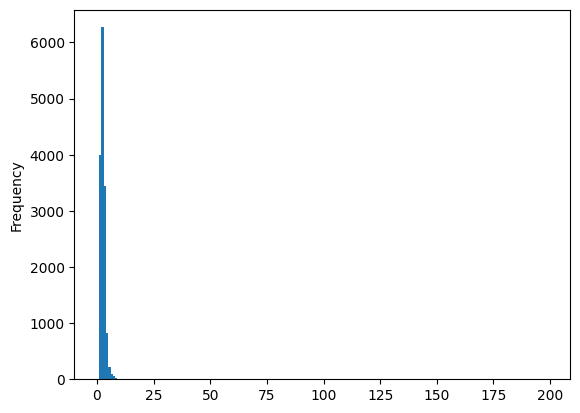

In [9]:
all_results.time_ms.plot(kind="hist", bins=range(200))

<Axes: ylabel='Frequency'>

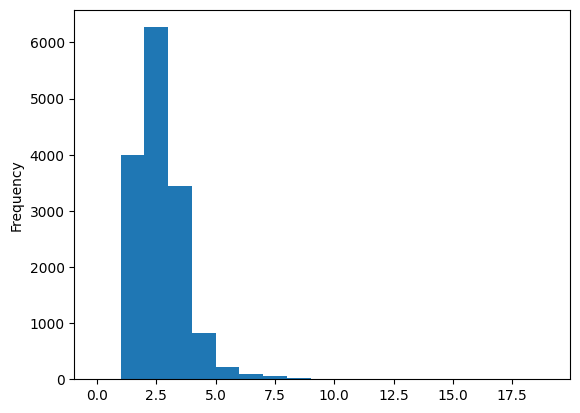

In [10]:
all_results.time_ms.plot(kind="hist", bins=range(20))

In [11]:
# Grouping by topn to calculate average time
average_time_by_topn = all_results.groupby("topn")["time_ms"].mean()
average_time_by_topn

topn
5     2.593017
10    2.608258
15    2.355318
20    2.973401
25    3.374438
30    2.722172
Name: time_ms, dtype: float64

<Axes: title={'center': 'Average time (ms) per topn'}, xlabel='topn'>

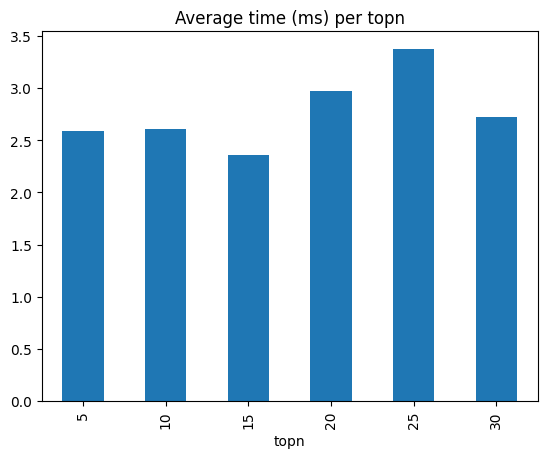

In [12]:
average_time_by_topn.plot(kind="bar", title="Average time (ms) per topn")

In [13]:
all_results["time_ms"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99])

count    15000.000000
mean         2.771101
std          1.938353
min          1.317263
50%          2.524853
75%          3.152132
90%          3.881335
95%          4.484904
99%          6.987123
max        103.262901
Name: time_ms, dtype: float64